In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data/Housing.csv")

# Show the first 5 rows
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Shape of dataset (rows, columns)
print("Shape of dataset:", data.shape)

# Column names
print("\nColumns in dataset:")
print(data.columns)

# Basic info about dataset
print("\nDataset Info:")
print(data.info())

# Basic statistics
print("\nSummary Statistics:")
print(data.describe())


Shape of dataset: (1460, 81)

Columns in dataset:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageAre

In [3]:
# Step 3: Data Cleaning & Preprocessing

# Drop columns that are not useful (like 'Id')
data = data.drop(["Id"], axis=1)

# Check missing values count
print("Missing values per column:\n", data.isnull().sum().sort_values(ascending=False).head(20))

# Fill missing numeric values with median
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing categorical values with mode
cat_cols = data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Double-check if missing values remain
print("\nRemaining missing values:", data.isnull().sum().sum())


Missing values per column:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
BldgType           0
dtype: int64

Remaining missing values: 0


C:\Users\AUSU\AppData\Local\Temp\ipykernel_24608\3230057086.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\AUSU\AppData\Local\Temp\ipykernel_24608\3230057086.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [4]:
# What kind of columns do we have?
print("Number of rows and columns:", data.shape)
print("\nFirst 15 column names:\n", list(data.columns[:15]))

# Check if any columns are not just numbers or text
print("\nColumn data types:")
print(data.dtypes.value_counts())


Number of rows and columns: (1460, 80)

First 15 column names:
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']

Column data types:
object     43
int64      34
float64     3
Name: count, dtype: int64


In [5]:
# Convert categorical (object type) columns into numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

print("Shape before encoding:", data.shape)
print("Shape after encoding:", data_encoded.shape)

# Show the first 5 rows of the encoded dataset
data_encoded.head()


Shape before encoding: (1460, 80)
Shape after encoding: (1460, 245)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split

# Features (everything except SalePrice) and Target (SalePrice)
X = data_encoded.drop("SalePrice", axis=1)
y = data_encoded["SalePrice"]

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1168, 244)
Test set shape: (292, 244)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2641205374.2309494
R² Score: 0.6556593157985733


In [8]:
import pandas as pd
import numpy as np

# Get feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# Sort by absolute value (biggest impact)
coefficients["abs_coeff"] = np.abs(coefficients["Coefficient"])
coefficients = coefficients.sort_values(by="abs_coeff", ascending=False)

print(coefficients[["Feature", "Coefficient"]].head(10))  # Top 10 features


              Feature    Coefficient
112    RoofMatl_Metal  703481.026720
116  RoofMatl_WdShngl  668839.346946
114  RoofMatl_Tar&Grv  660271.426169
110  RoofMatl_CompShg  656521.518961
115  RoofMatl_WdShake  655688.000282
113     RoofMatl_Roll  655372.666794
90    Condition2_PosN -235580.400627
215     GarageQual_Po -181120.458267
213     GarageQual_Fa -169707.472655
214     GarageQual_Gd -167095.373870


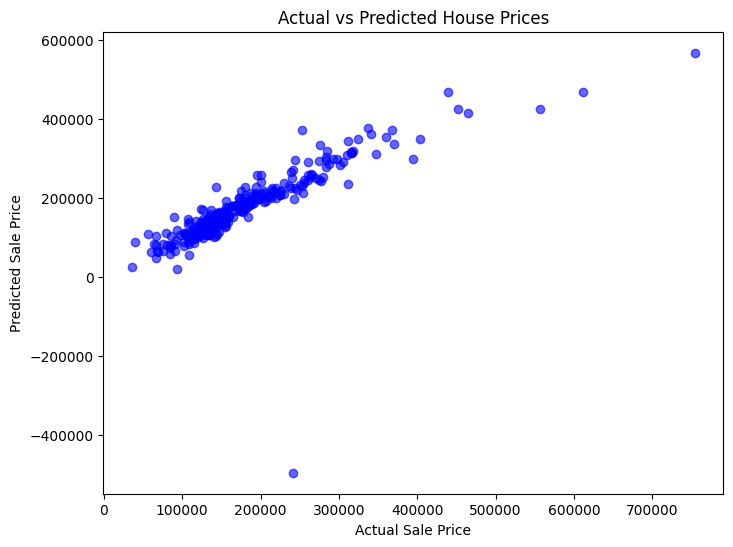

In [9]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


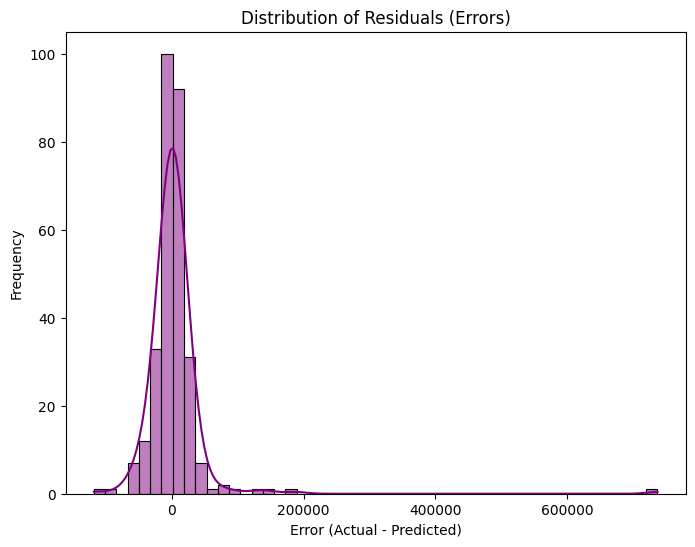

In [10]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True, color="purple")
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


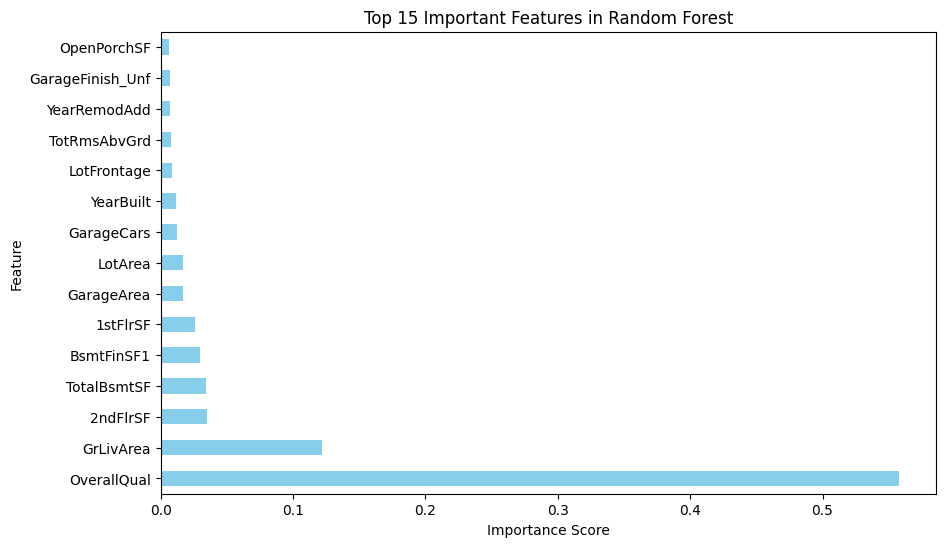

In [12]:
import pandas as pd

# Get feature importances from the trained random forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and display top 15
top_features = feature_importances.sort_values(ascending=False).head(15)
top_features.plot(kind='barh', figsize=(10,6), color="skyblue")
plt.title("Top 15 Important Features in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


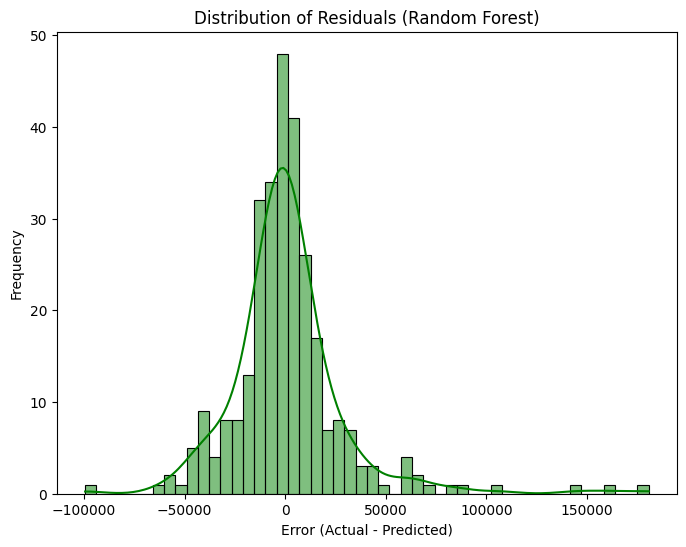

In [13]:
# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,6))
sns.histplot(residuals_rf, bins=50, kde=True, color="green")
plt.title("Distribution of Residuals (Random Forest)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


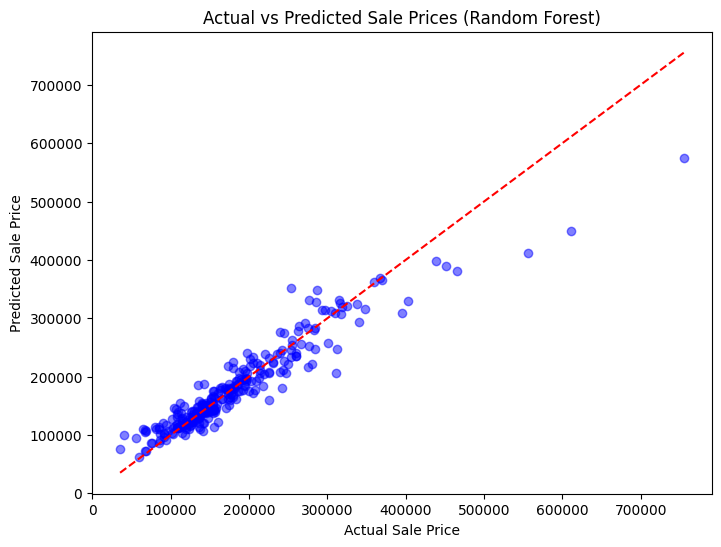

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  
plt.title("Actual vs Predicted Sale Prices (Random Forest)")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()
